### Seoul Covid-19 Occurance Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. 2020/06/30까지의 서울 코로나19 발생 데이터 불러오기

In [2]:
# 데이터 csv 파일 읽어오기
df = pd.read_csv("./seoul-covid19_6_30_.csv")
df.shape

(1321, 7)

In [3]:
# '연번' 컬럼으로 정렬하기
df = df.sort_values(by='연번', ascending=False)
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


#### 2. 시각화 도구 불러오기

In [4]:
# matplotlib.pyplot.rc로 한글폰트 설정
# plt.style.use로 'fivethirtyeight' 스타일 사용
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.style.use("fivethirtyeight")

#### 3. 확진일

In [5]:
# '확진일' 빈도수 확인
df['확진일'].value_counts()

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
4.20.     1
4.19.     1
4.18.     1
4.15.     1
1.24.     1
Name: 확진일, Length: 131, dtype: int64

In [6]:
# '확진일' 컬럼의 데이터가 오브젝트 형식
# datetime 형식으로 변환 필요
# 연도가 없으므로 2020년 임의로 추가
df['확진일자'] = pd.to_datetime('2020-' + df['확진일'].str.replace(".", "-"))
df[['확진일', '확진일자']].head()

C:\Users\Han\AppData\Local\Temp\ipykernel_20336\636754021.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['확진일자'] = pd.to_datetime('2020-' + df['확진일'].str.replace(".", "-"))


,확진일,확진일자
0,6.30.,2020-06-30
1,6.30.,2020-06-30
2,6.30.,2020-06-30
3,6.30.,2020-06-30
4,6.30.,2020-06-30


In [7]:
# 월만 추출
df['월'] = df["확진일자"].dt.month
df[['확진일', '확진일자', '월']].head()

,확진일,확진일자,월
0,6.30.,2020-06-30,6
1,6.30.,2020-06-30,6
2,6.30.,2020-06-30,6
3,6.30.,2020-06-30,6
4,6.30.,2020-06-30,6


In [8]:
# 2020년 몇번째 주인지 추출
df['주'] = df['확진일자'].dt.week
df[['확진일', '확진일자', '월', '주']].head()

C:\Users\Han\AppData\Local\Temp\ipykernel_20336\467928631.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['주'] = df['확진일자'].dt.week


,확진일,확진일자,월,주
0,6.30.,2020-06-30,6,27
1,6.30.,2020-06-30,6,27
2,6.30.,2020-06-30,6,27
3,6.30.,2020-06-30,6,27
4,6.30.,2020-06-30,6,27


##### 3.1 선그래프 그리기

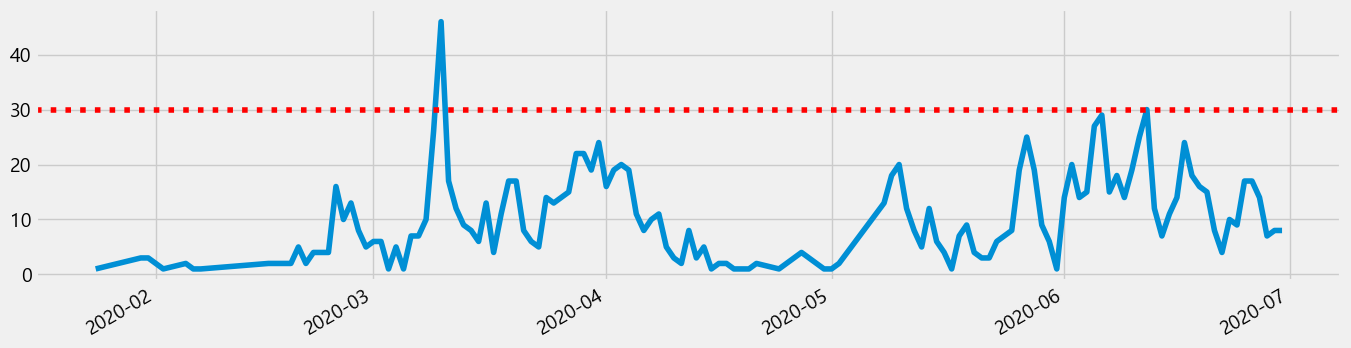

In [9]:
# 확진일자 선그래프
df["확진일자"].value_counts().sort_index().plot(figsize=(15, 4))
plt.axhline(30, color="red", linestyle=":")

##### 3.2 선그래프에 값 표시하기

In [10]:
# 일자별 확진자수 선그래프
# 연도 모두 2020년이므로 월, 일만 표시되도록 컬럼 추가
df["월일"] = df["확진일자"].astype(str).map(lambda x: x[5:])
day_count = df["월일"].value_counts().sort_index()
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
06-26    17
06-27    14
06-28     7
06-29     8
06-30     8
Name: 월일, Length: 130, dtype: int64

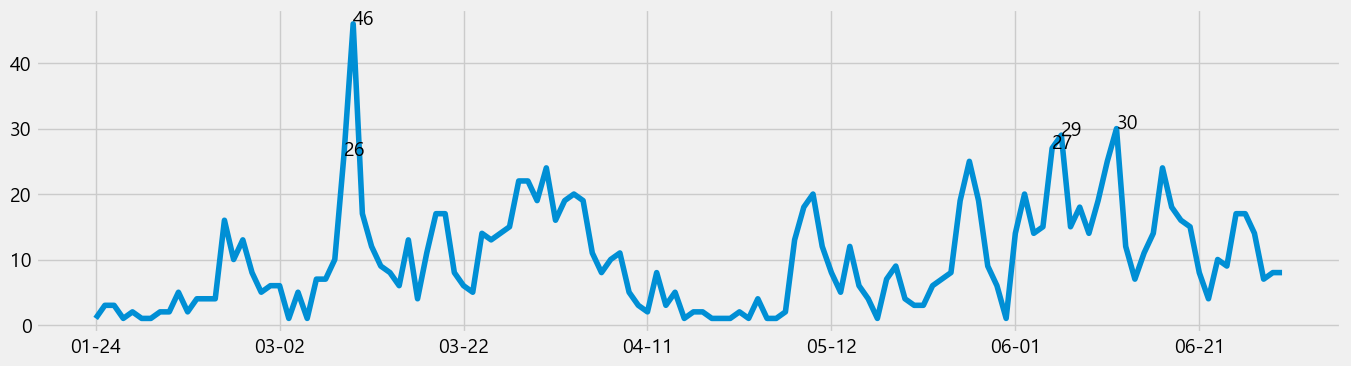

In [11]:
# 확진 수가 25명 초과인 경우만 텍스트 표시
g = day_count.plot(figsize=(15, 4))
for i in range(len(day_count)):
    if day_count.iloc[i] > 25:
        g.text(x=i, y=day_count.iloc[i], s=day_count.iloc[i])

##### 3.3 확진자가 가장 많이 나온 날

In [12]:
# describe로 일자별 확진자수 요약
day_count.describe()

count    130.000000
mean      10.161538
std        7.917015
min        1.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       46.000000
Name: 월일, dtype: float64

In [13]:
# 확진자가 가장 많은 날
day_count[day_count == day_count.max()]

03-10    46
Name: 월일, dtype: int64

In [14]:
# 확진자가 가장 많은 날의 발생 이력
df[df["월일"] == "03-10"].head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1119,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1120,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1121,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1122,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1123,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10


##### 3.4 막대그래프 그리기

<AxesSubplot:>

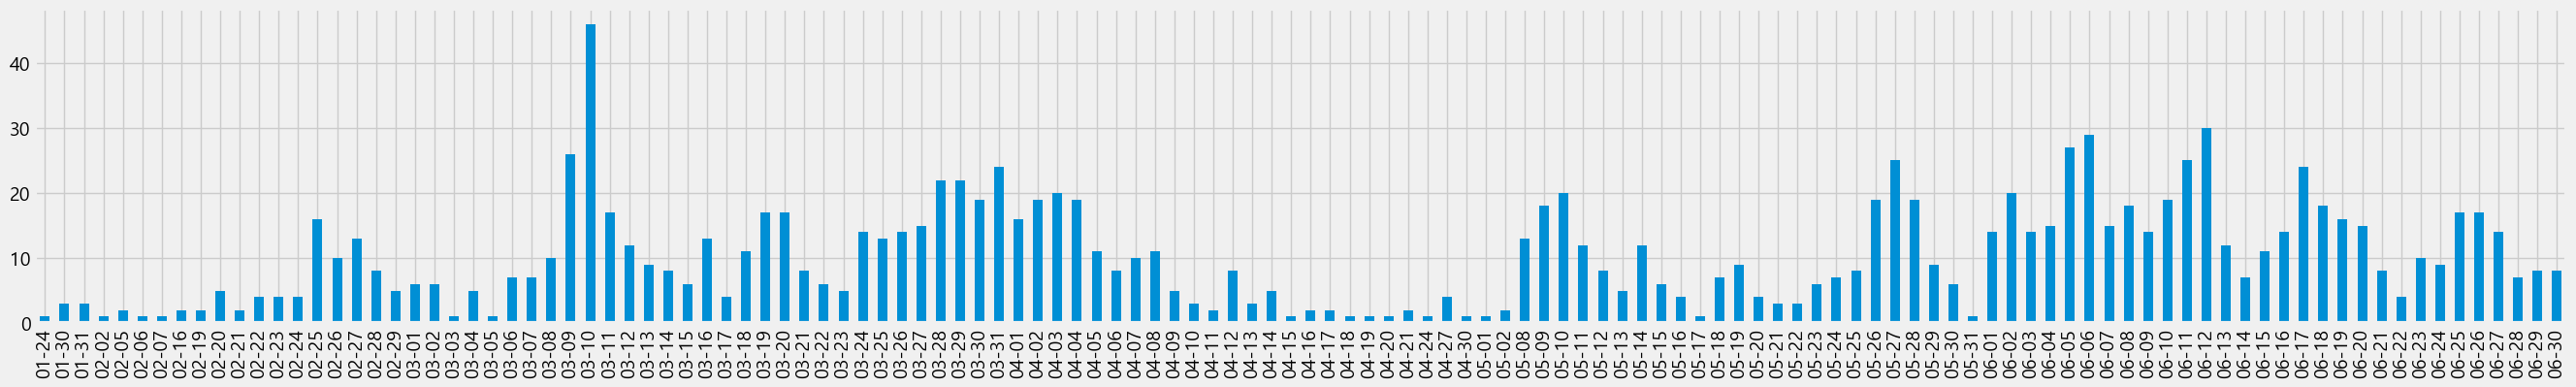

In [15]:
# 확진일자 막대그래프
day_count.plot.bar(figsize=(30, 4))

##### 3.5 최근 데이터만 슬라이싱으로 나눠 그리기

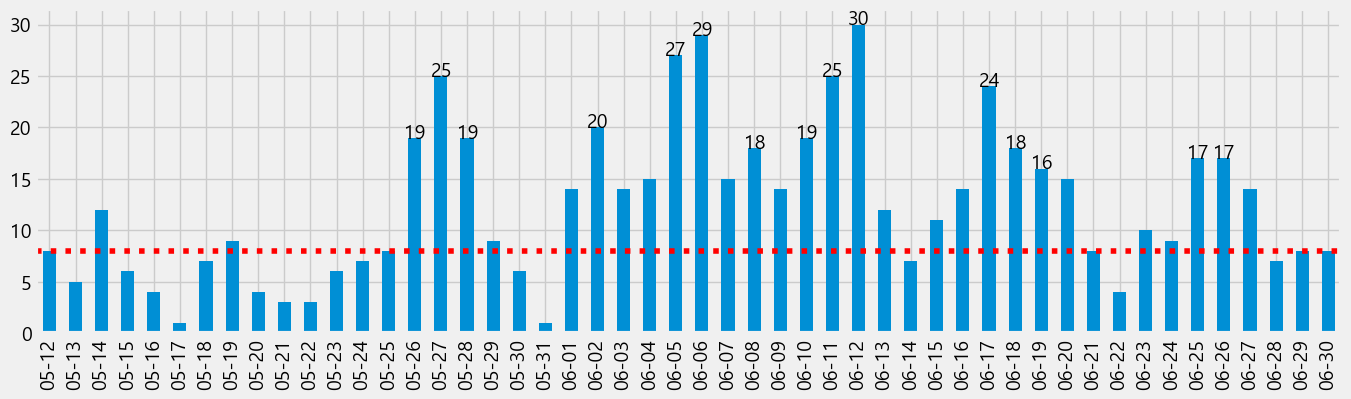

In [16]:
# 최근 데이터 슬라이싱하여 그리기
g = day_count[-50:].plot.bar(figsize=(15, 4))
g.axhline(day_count.median(), color="red", linestyle=":")

for i in range(50):
    if day_count[-50:].iloc[i] > 15:
        g.text(x=i-0.4, y=day_count[-50:].iloc[i], s=day_count[-50:].iloc[i])    

##### 3.6 월별 확진자수 그리기

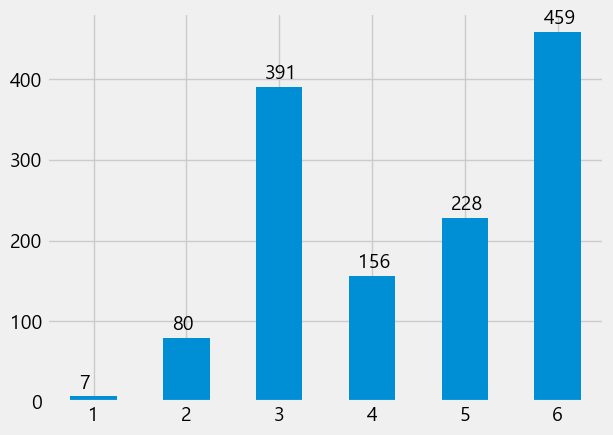

In [17]:
# 월별 확진자 빈도수 시각화
month_count = df["월"].value_counts().sort_index()
g = month_count.plot.bar(rot=0)
for i in range(len(month_count)):
    g.text(x=i-0.15, y=month_count.iloc[i]+10, s=month_count.iloc[i])

##### 3.7 주별 확진자수 그리기

<AxesSubplot:>

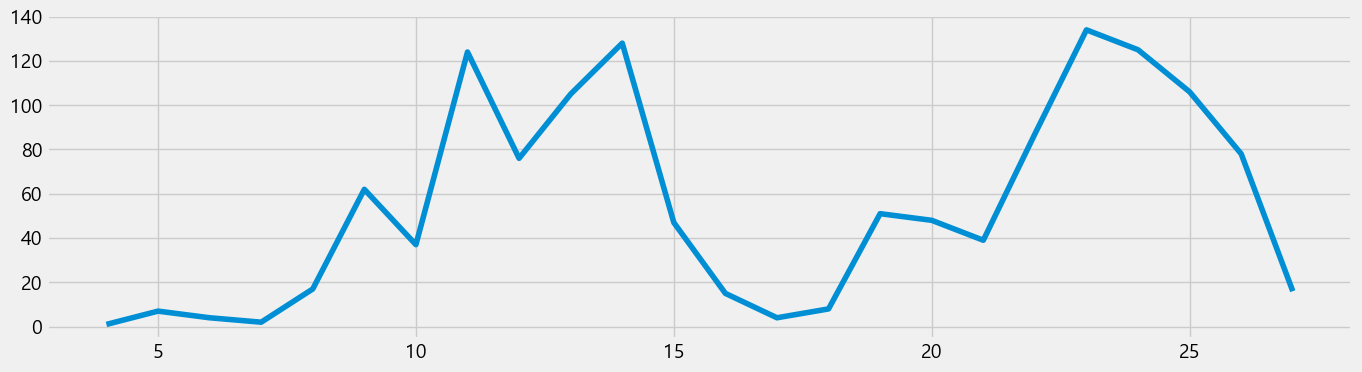

In [18]:
# 주별 확진자수 그래프 
week_case = df["주"].value_counts().sort_index()
week_case.plot(figsize=(15, 4))

<AxesSubplot:>

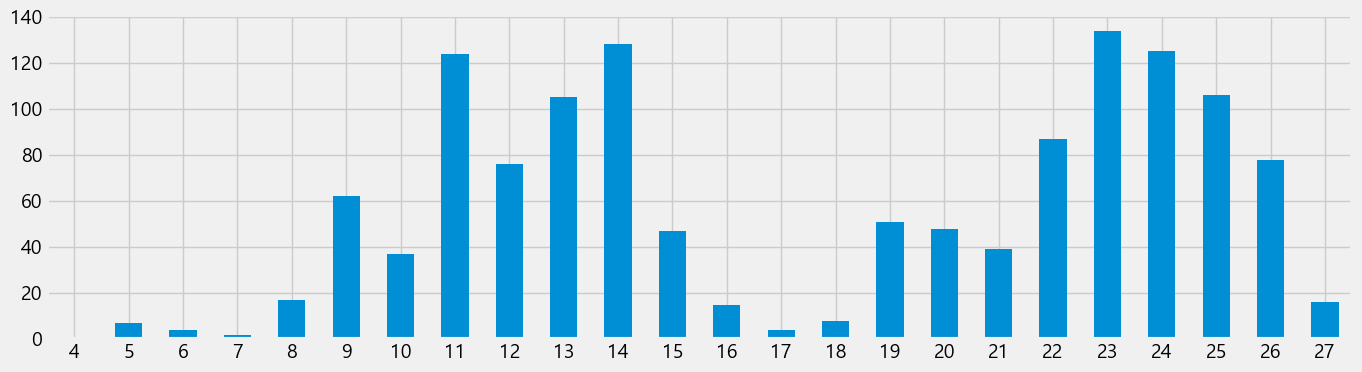

In [19]:
# 주별 확진자수 막대그래프
week_case.plot.bar(figsize=(15, 4), rot=0)

##### 3.8 월, 주 함께 그리기

In [20]:
# groupby로 "월", "주" 그룹화하여 확진자수 계산
month_week_count = df.groupby(["월", "주"])["연번"].count()
month_week_count

월  주 
1  4       1
   5       6
2  5       1
   6       4
   7       2
   8      17
   9      56
3  9       6
   10     37
   11    124
   12     76
   13    105
   14     43
4  14     85
   15     47
   16     15
   17      4
   18      5
5  18      3
   19     51
   20     48
   21     39
   22     87
6  23    134
   24    125
   25    106
   26     78
   27     16
Name: 연번, dtype: int64

<AxesSubplot:xlabel='월,주'>

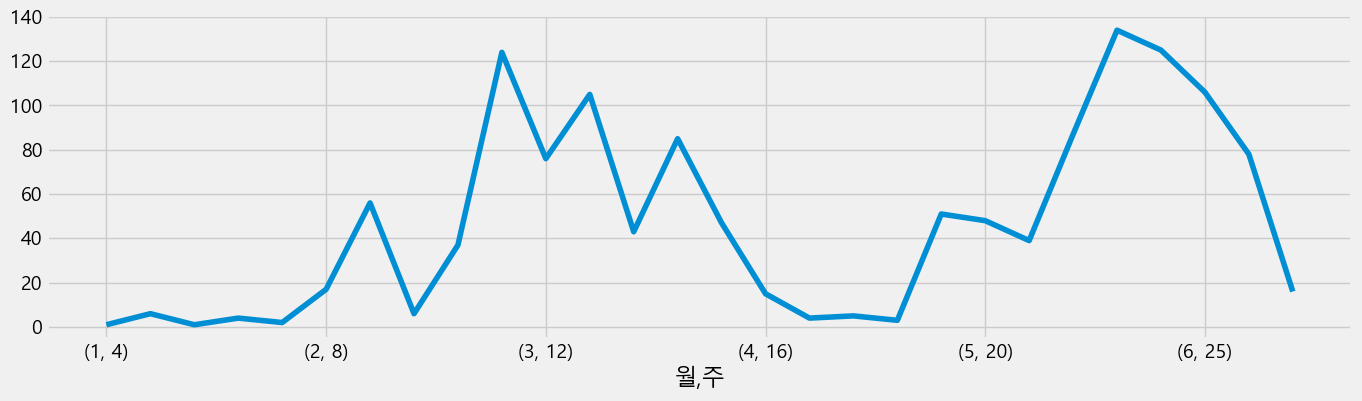

In [21]:
# ["월", "주" ] 그래프
month_week_count.plot(figsize=(15, 4))

<AxesSubplot:xlabel='월,주'>

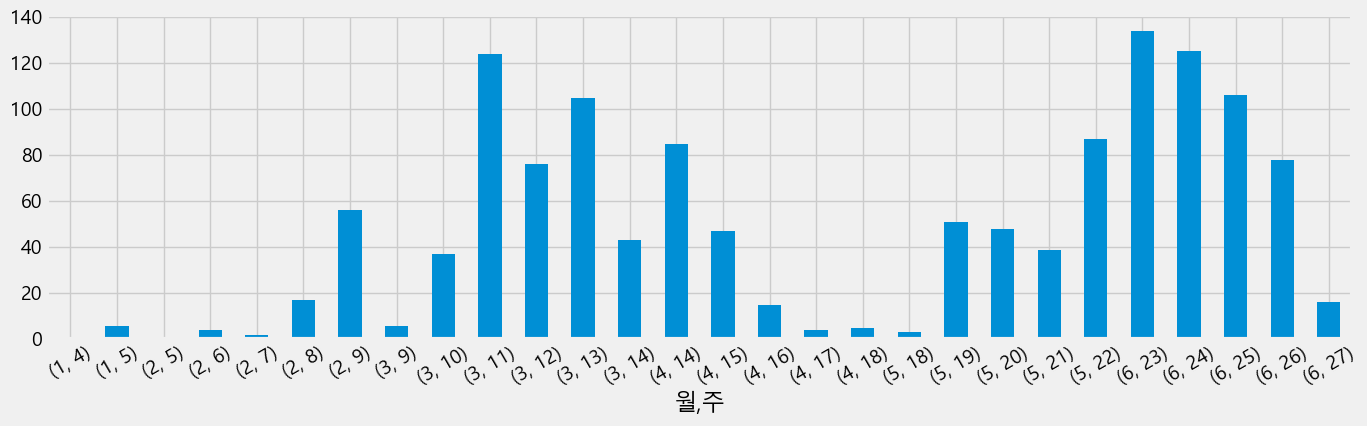

In [22]:
# ["월", "주"] 막대그래프
month_week_count.plot.bar(figsize=(15, 4), rot=30)

### 4. 모든 날짜를 행에 만들어 주기
- 확진자가 없는 날의 데이터도 만들기

In [27]:
# 첫 확진일과 마지막 확진일 가져오기
first_day = df.iloc[-1][7]
last_day = df.iloc[0][7]
print(first_day, last_day)

2020-01-24 00:00:00 2020-06-30 00:00:00


In [28]:
# pd.date_range를 통해 시작 날짜부터 끝 날짜까지 DateTimeIndex 만들기
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', length=159, freq='D')

In [32]:
# days로 "확진일자"라는 컬럼을 가지는 데이터프레임 가지기
# days.to_frame()
df_days = pd.DataFrame({"확진일자": days})
df_days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [44]:
# 일자별 빈도수 데이터프레임 변환
df_day_count = pd.DataFrame(df["확진일자"].value_counts())
df_day_count.columns = ["확진수"]
df_day_count.head()

,확진수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


#### 4.1 merge를 통해 전체 확진일자 만들기

In [50]:
# 전체 일자와 확진수 데이터를 merge로 합치기
# NAN값 0으로 수정 
all_days = df_days.merge(df_day_count, how="outer", left_on="확진일자", right_on=df_day_count.index)
all_days.fillna(0, inplace=True)
all_days.head()

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,0.0
2,2020-01-26,0.0
3,2020-01-27,0.0
4,2020-01-28,0.0


### 5. 누적 확진자수

In [54]:
# "누적확진" 컬럼을 추가하여 누적확진자수 계산
all_days["누적확진"] = all_days["확진수"].cumsum()
all_days

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,0.0,1.0
2,2020-01-26,0.0,1.0
3,2020-01-27,0.0,1.0
4,2020-01-28,0.0,1.0
...,...,...,...
154,2020-06-26,17.0,1284.0
155,2020-06-27,14.0,1298.0
156,2020-06-28,7.0,1305.0
157,2020-06-29,8.0,1313.0


In [59]:
# 연도 제외하고 "일자" 컬럼 만들기 (map 함수 이용)
all_days["일자"] = all_days["확진일자"].astype(str).map(lambda x: x[-5:])
all_days

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,0.0,1.0,01-25
2,2020-01-26,0.0,1.0,01-26
3,2020-01-27,0.0,1.0,01-27
4,2020-01-28,0.0,1.0,01-28
...,...,...,...,...
154,2020-06-26,17.0,1284.0,06-26
155,2020-06-27,14.0,1298.0,06-27
156,2020-06-28,7.0,1305.0,06-28
157,2020-06-29,8.0,1313.0,06-29


In [62]:
# 일자를 인덱스로 하고 "확진수", "누적확진" 컬럼을 가지는 데이터프레임 만들기
cum_day = all_days[["일자", "확진수", "누적확진"]]
cum_day.set_index("일자", inplace=True)
cum_day.head()

,확진수,누적확진
일자,,
01-24,1.0,1.0
01-25,0.0,1.0
01-26,0.0,1.0
01-27,0.0,1.0
01-28,0.0,1.0


#### 5.1 데이터프레임으로 그리기

<AxesSubplot:xlabel='일자'>

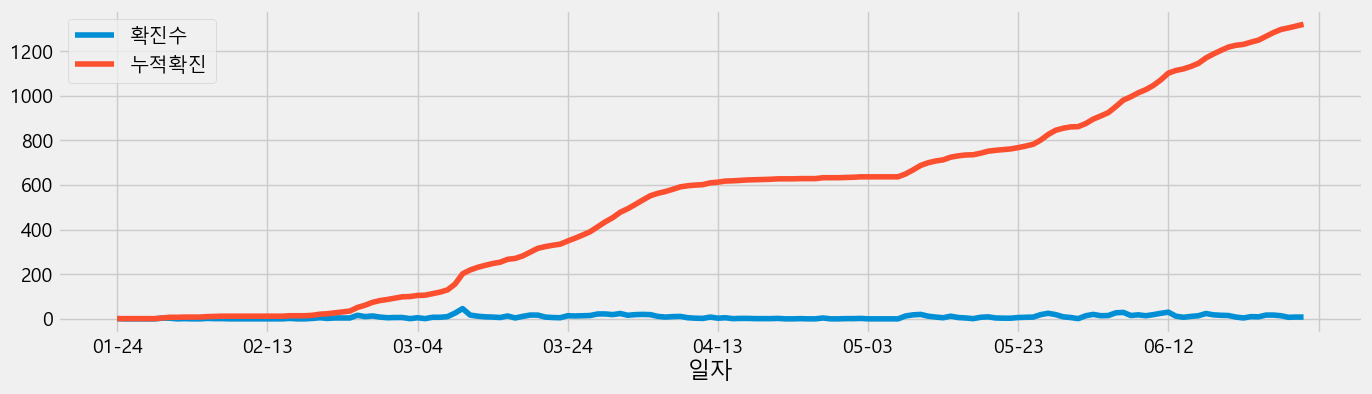

In [63]:
# 데이터프레임으로 확진수와 누적확진 그래프 그리기
cum_day.plot(figsize=(15, 4))

#### 5.2 시리즈로 그리기

<AxesSubplot:xlabel='일자'>

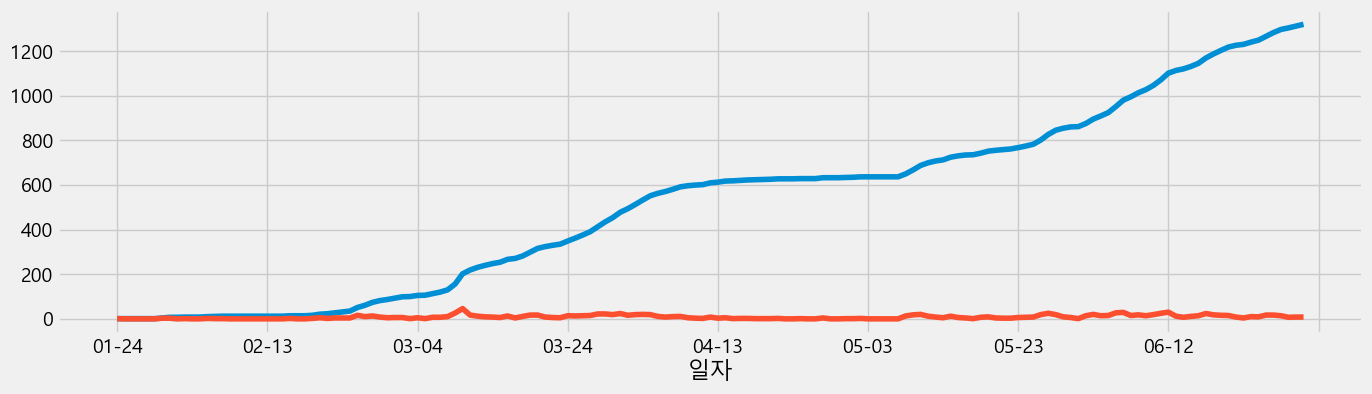

In [66]:
# 시리즈로 2개 그래프 그리기
cum_day["확진수"].plot()
cum_day["누적확진"].plot(figsize=(15, 4))

#### 5.3 확진수만 따로 그리기

<AxesSubplot:xlabel='일자'>

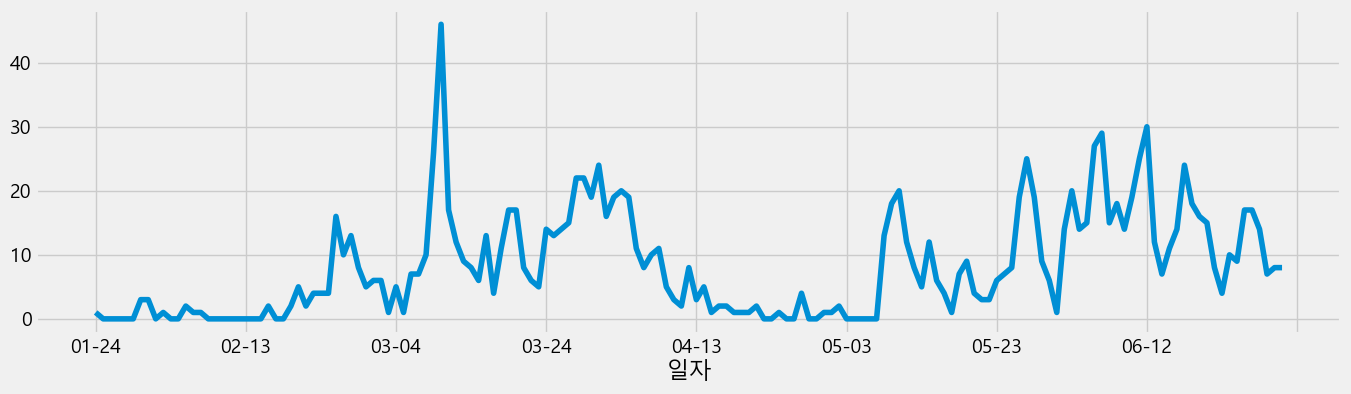

In [67]:
# 확진수만 따로 그리기
cum_day["확진수"].plot(figsize=(15, 4))

#### 5.4 누적확진만 따로 그리기

<AxesSubplot:xlabel='일자'>

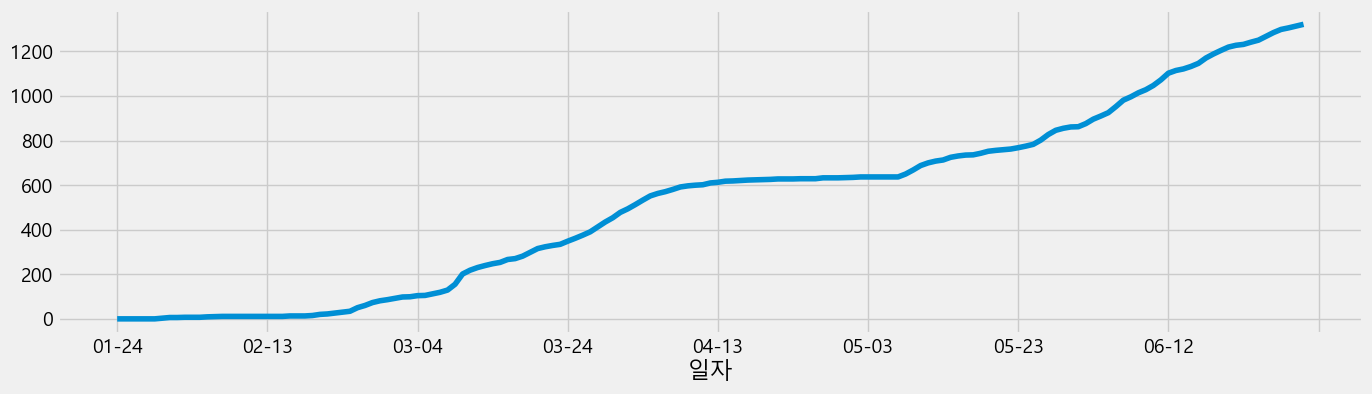

In [68]:
cum_day["누적확진"].plot(figsize=(15, 4))

#### 5.5 로그스케일로 그리기
- 차이가 너무 커서 그래프 비교가 어려우면 로그스케일로 표현

<AxesSubplot:xlabel='일자'>

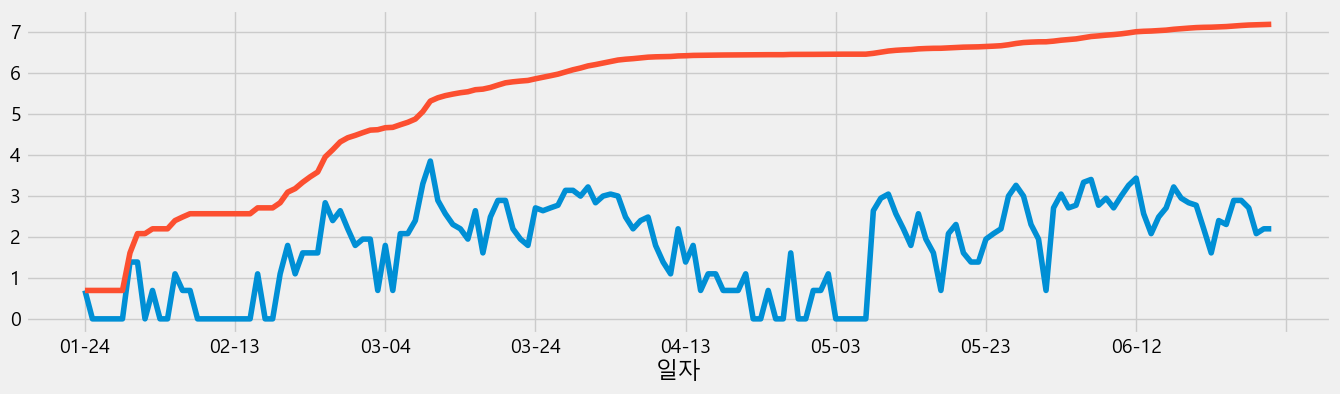

In [73]:
# -무한대 수렴 방지 위해 1 더하기도 함
np.log(cum_day["확진수"] + 1).plot()
np.log(cum_day["누적확진"] + 1).plot(figsize=(15, 4))

### 6. 확진월과 요일 구하기

In [78]:
all_days["확진월"] = all_days["확진일자"].dt.month
all_days["확진요일"] = all_days["확진일자"].dt.dayofweek
all_days.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,0.0,1.0,01-25,1,5
2,2020-01-26,0.0,1.0,01-26,1,6
3,2020-01-27,0.0,1.0,01-27,1,0
4,2020-01-28,0.0,1.0,01-28,1,1


#### 6.1 요일별 확진 수

In [95]:
# 월별, 요일별 확진수 groupby로 구하기
all_days_week = all_days.groupby(["확진월", "확진요일"])["확진수"].sum()
# unstack으로 멀티인덱스 중 가장 마지막의 인덱스를 컬럼으로 변환
all_days_week = all_days_week.unstack().astype(int)
all_days_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


In [96]:
# 숫자로 표현된 요일을 문자로 바꿔주기
dayofweek = "월 화 수 목 금 토 일".split(" ")
all_days_week.columns = dayofweek
all_days_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


In [98]:
# style.background_gradient로 색상 표현
all_days_week.style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


### 7. 거주지별 확진자

In [100]:
# 각 구 별 확진자 빈도수 확인
gu_count = df["거주지"].value_counts()
gu_count.head()

관악구    117
구로구     86
강남구     83
강서구     78
양천구     70
Name: 거주지, dtype: int64

<AxesSubplot:>

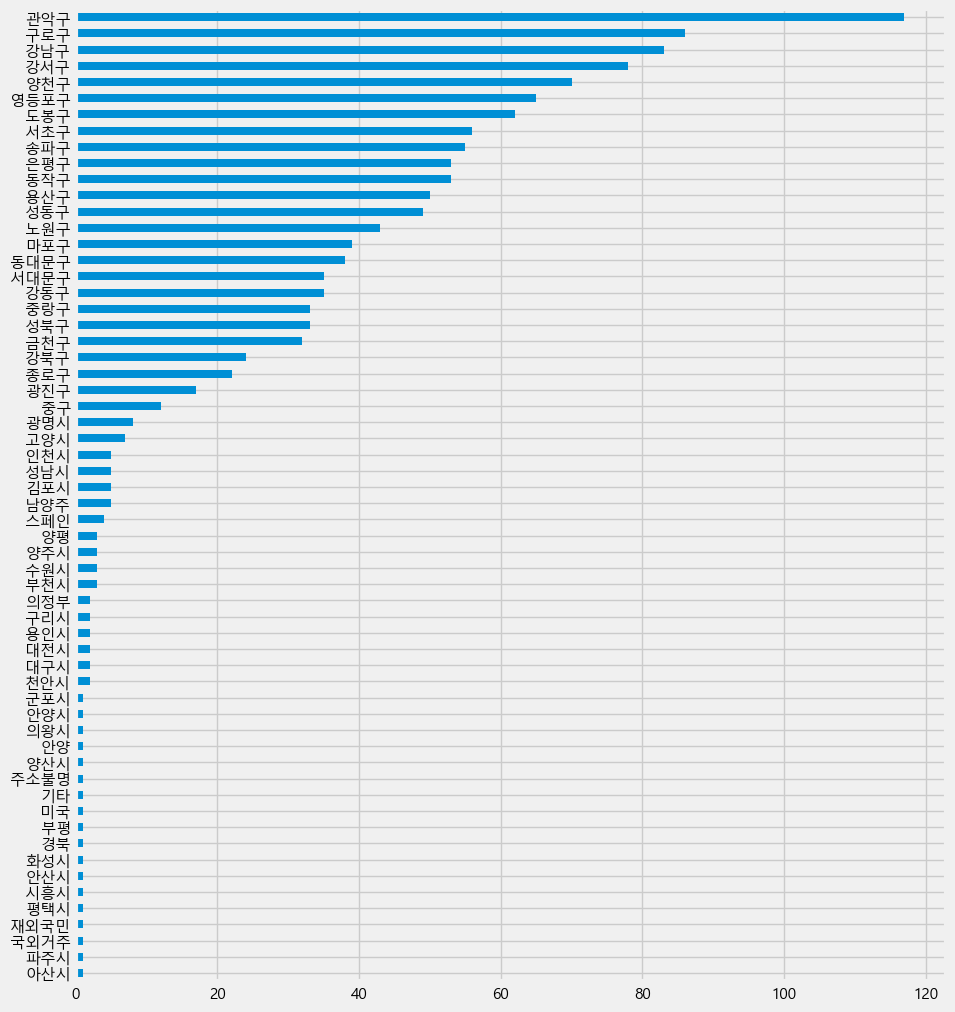

In [107]:
# 구 별 확진자 빈도수 시각화
gu_count.sort_values().plot.barh(figsize=(10, 12), fontsize=11)

In [111]:
# 거주지 중 서울에 포함되는 지역만 가져오기
gu = gu_count[:25].index
gu

Index(['관악구', '구로구', '강남구', '강서구', '양천구', '영등포구', '도봉구', '서초구', '송파구', '은평구',
       '동작구', '용산구', '성동구', '노원구', '마포구', '동대문구', '서대문구', '강동구', '중랑구', '성북구',
       '금천구', '강북구', '종로구', '광진구', '중구'],
      dtype='object')

In [112]:
# 거주지 중 서울에 포함되지 않는 지역만 가져오기
set(gu_count.index) - set(gu)

{'경북',
 '고양시',
 '광명시',
 '구리시',
 '국외거주',
 '군포시',
 '기타',
 '김포시',
 '남양주',
 '대구시',
 '대전시',
 '미국',
 '부천시',
 '부평',
 '성남시',
 '수원시',
 '스페인',
 '시흥시',
 '아산시',
 '안산시',
 '안양',
 '안양시',
 '양산시',
 '양주시',
 '양평',
 '용인시',
 '의왕시',
 '의정부',
 '인천시',
 '재외국민',
 '주소불명',
 '천안시',
 '파주시',
 '평택시',
 '화성시'}

In [115]:
# 데이터프레임으로 만들기 위해 reset_index 사용
df_gu = gu_count.reset_index()
df_gu.columns = ["구", "확진수"]
df_gu.head()

,구,확진수
0,관악구,117
1,구로구,86
2,강남구,83
3,강서구,78
4,양천구,70


In [119]:
# 서울 구
df_gu[df_gu["구"].isin(gu)]
# 서울 이외 타지역
# df_gu[~df_gu["구"].isin(gu)]

,구,확진수
0,관악구,117
1,구로구,86
2,강남구,83
3,강서구,78
4,양천구,70
5,영등포구,65
6,도봉구,62
7,서초구,56
8,송파구,55
9,은평구,53


In [124]:
# 서울 vs 타지역 비교를 위해 "지역" 컬럼으로 서울과 타지역 구분
df.loc[df["거주지"].isin(gu), "지역"] = df["거주지"]
df["지역"] = df["지역"].fillna("타지역") # fillna 사용시 다시 대입해줘야 함
df["지역"].unique()

array(['영등포구', '관악구', '금천구', '마포구', '타지역', '은평구', '노원구', '서초구', '송파구',
       '구로구', '용산구', '양천구', '강남구', '동대문구', '중구', '동작구', '광진구', '중랑구',
       '강서구', '종로구', '도봉구', '강동구', '성북구', '성동구', '서대문구', '강북구'],
      dtype=object)

In [128]:
# 위 방법 대신 람다함수로도 타지역 구분 가능
df["지역"] = df["거주지"].map(lambda x: x if x in gu else "타지역")
df["지역"].unique()

array(['영등포구', '관악구', '금천구', '마포구', '타지역', '은평구', '노원구', '서초구', '송파구',
       '구로구', '용산구', '양천구', '강남구', '동대문구', '중구', '동작구', '광진구', '중랑구',
       '강서구', '종로구', '도봉구', '강동구', '성북구', '성동구', '서대문구', '강북구'],
      dtype=object)

In [131]:
# "지역" 컬럼 기반으로 확진자수 세기
gu_etc_count = df["지역"].value_counts()
gu_etc_count

관악구     117
구로구      86
강남구      83
타지역      81
강서구      78
양천구      70
영등포구     65
도봉구      62
서초구      56
송파구      55
은평구      53
동작구      53
용산구      50
성동구      49
노원구      43
마포구      39
동대문구     38
강동구      35
서대문구     35
중랑구      33
성북구      33
금천구      32
강북구      24
종로구      22
광진구      17
중구       12
Name: 지역, dtype: int64

<AxesSubplot:>

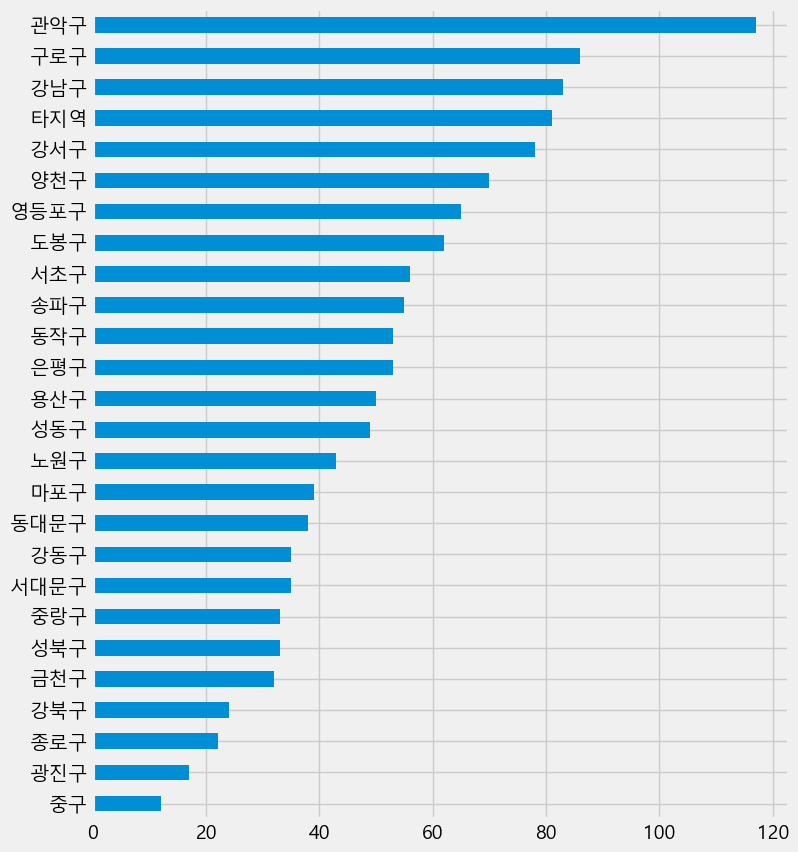

In [135]:
# 지역별 확진자수를 막대그래프로 그리기
gu_etc_count.sort_values().plot.barh(figsize=(8, 10))

### 8. 접촉력

In [138]:
# 접촉력 빈도수
df["접촉력"].value_counts().head(20)

해외 접촉 추정       280
이태원 클럽 관련      139
리치웨이 관련        119
확인 중            99
구로구 콜센터 관련      60
요양시설 관련         43
양천구 운동시설 관련     43
구로구 교회 관련       41
확인중             39
타시도 확진자 접촉      38
콜센터직원 접촉        37
수도권 개척교회 관련     37
동대문구 관련         28
왕성교회 관련         25
부천시 쿠팡 관련       24
해외 접촉           22
은평구 병원 관련       14
kb 생명보험 관련      13
성동구 아파트 관련      13
강남구 역삼동 모임       8
Name: 접촉력, dtype: int64

In [139]:
# 접촉력 unique 값 구하기
df["접촉력"].unique()

array(['영등포구 확진자 접촉', '확인 중', '강남구 역삼동 모임', '왕성교회 관련', '대전 꿈꾸는 교회',
       '타시도 확진자 접촉', '리치웨이 관련', '해외 접촉 추정', '용산구 확진자 접촉', '구로구 확진자 접촉',
       '관악구 확진자 접촉', '동작구 확진자 접촉', '금천구 확진자 접촉', '강서구 확진자 접촉', '요양시설 관련',
       '강동구 확진자 접촉', '시청역 관련', '대자연코리아', '의왕 물류센터 관련', '금천구 도정기 회사 관련',
       '양천구 운동시설 관련', '은평구 확진자 접촉', '대전 다단계 관련', '오렌지라이프 관련',
       '수도권 개척교회 관련', '서초구 확진자 접촉', '타시도 확진자 접촉자', '연아나뉴스클래스 관련',
       '한국대학생선교회 관련', '해외접촉 추정', 'kb 생명보험 관련', '부천시 쿠팡 관련', '이태원 클럽 관련',
       '용인 형제 관련', '삼성화재 관련', '서초구 가족 관련', '안양군포 목회자 관련', '서초구 가족관련',
       '영등포 학원 관련', '강남구 동인교회 관련', '원어성경연구회 관련', '#11196 접촉', '삼성서울병원 관련',
       '#10054 접촉', '#9800 접촉', '#10044 접촉', '#9641 접촉', '구로구 교회 관련',
       '#10407 접촉', '#10015 접촉', '#9364 접촉', '#10377 접촉', '#9287 접촉',
       '#10142 접촉', '#9912 접촉', '#9765 접촉', '#10115 접촉', '타시도 확진자 접촉(추정)',
       '#8063 접촉', '#10084 접촉', '#8601 접촉', '#8717 접촉', '#9946 접촉',
       '콜센터직원 접촉', '#8271 접촉', '#8669 접촉', '#9734 접촉', '#9621 접촉',
       '#9572 접촉',

In [141]:
# "확인" 들어가는 접촉력 찾기
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [142]:
# "확인중" => "확인 중" 으로 변경
df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

<AxesSubplot:>

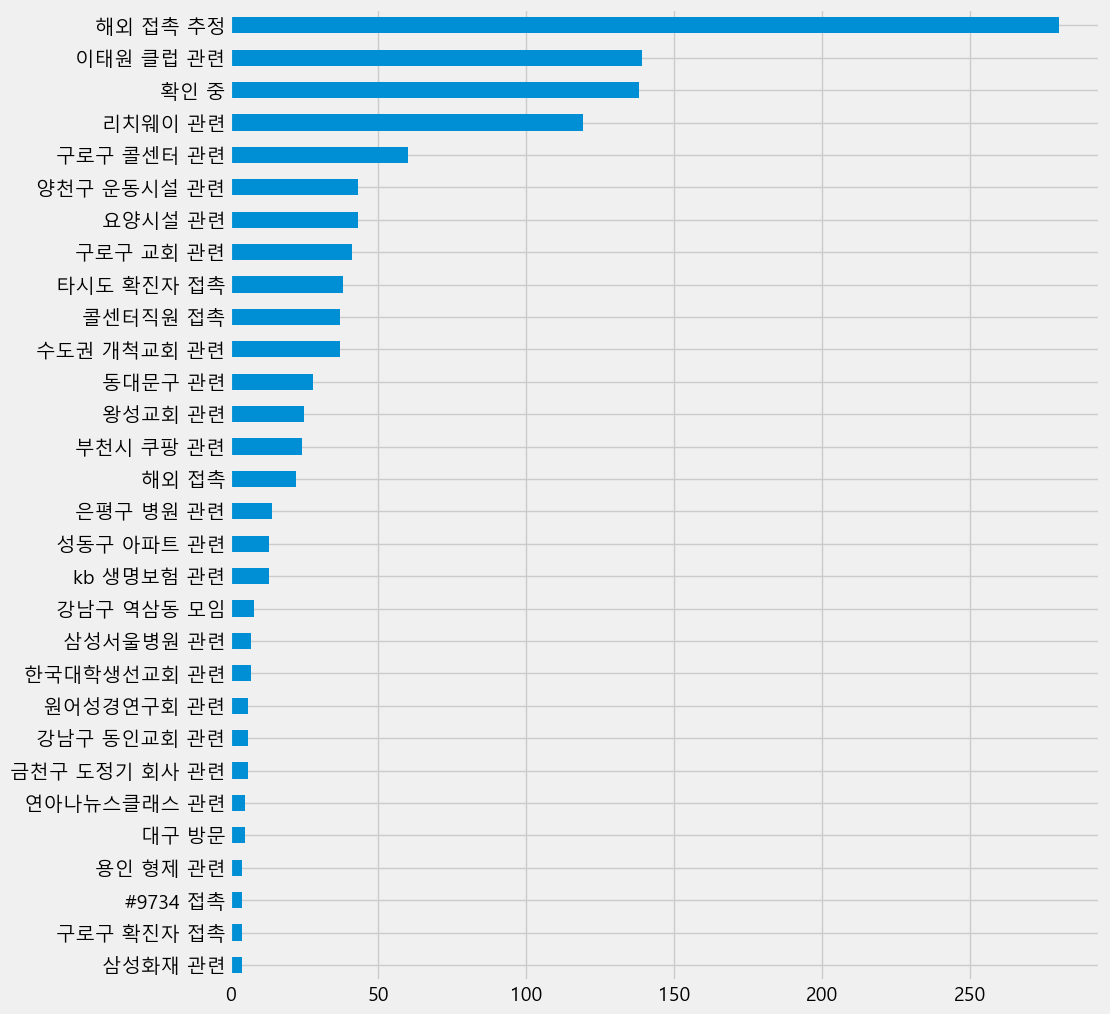

In [151]:
# 접촉력 빈도수 시각화
contact_count = df["접촉력"].value_counts()
contact_count.head(30).sort_values().plot.barh(figsize=(10, 12))

In [153]:
# 상위 15개만 가져오기
top_contact = contact_count.head(15) 
top_contact

해외 접촉 추정       280
이태원 클럽 관련      139
확인 중           138
리치웨이 관련        119
구로구 콜센터 관련      60
양천구 운동시설 관련     43
요양시설 관련         43
구로구 교회 관련       41
타시도 확진자 접촉      38
콜센터직원 접촉        37
수도권 개척교회 관련     37
동대문구 관련         28
왕성교회 관련         25
부천시 쿠팡 관련       24
해외 접촉           22
Name: 접촉력, dtype: int64

In [156]:
# 상위 15개의 인덱스 살펴보기
top_contact.index

Index(['해외 접촉 추정', '이태원 클럽 관련', '확인 중', '리치웨이 관련', '구로구 콜센터 관련', '양천구 운동시설 관련',
       '요양시설 관련', '구로구 교회 관련', '타시도 확진자 접촉', '콜센터직원 접촉', '수도권 개척교회 관련',
       '동대문구 관련', '왕성교회 관련', '부천시 쿠팡 관련', '해외 접촉'],
      dtype='object')

In [158]:
# 위에서 구한 top_contact에 해당하는 데이터만 isin으로 살펴보기
top_group = df.loc[df["접촉력"].isin(top_contact.index)]
top_group.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,06-30,관악구
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,06-30,영등포구
6,1315,12810,6.30.,금천구,-,왕성교회 관련,서남병원,2020-06-30,6,27,06-30,금천구
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,06-29,타지역
9,1312,12789,6.29.,은평구,-,확인 중,서북병원,2020-06-29,6,27,06-29,은평구


In [163]:
# 접촉력, 월별 빈도수 groupby 계산 및 unstack으로 데이터프레임 표현
top_group.groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)

월,1,2,3,4,5,6
접촉력,,,,,,
구로구 교회 관련,0,0,35,6,0,0
구로구 콜센터 관련,0,0,60,0,0,0
동대문구 관련,0,0,28,0,0,0
리치웨이 관련,0,0,0,0,0,119
부천시 쿠팡 관련,0,0,0,0,19,5
수도권 개척교회 관련,0,0,0,0,0,37
양천구 운동시설 관련,0,0,0,0,0,43
왕성교회 관련,0,0,0,0,0,25
요양시설 관련,0,0,0,0,0,43


#### 8.1 이태원 클럽 관련

In [166]:
# 6월의 이태원 클럽 관련 확진자 살펴보기
df[df["접촉력"].str.contains("이태원") & (df["월"] == 6)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일,지역
341,980,11786,6.06.,성동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-06,6,23,06-06,성동구
356,965,11741,6.06.,은평구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-06,6,23,06-06,은평구
365,956,11730,6.06.,성동구,-,이태원 클럽 관련,서울대병원,2020-06-06,6,23,06-06,성동구
372,949,11775,6.05.,은평구,-,이태원 클럽 관련,국립중앙의료원(퇴원),2020-06-05,6,23,06-05,은평구
387,934,11687,6.05.,성동구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-05,6,23,06-05,성동구
445,876,11535,6.01.,강동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-01,6,23,06-01,강동구
